# Data Driven Modeling
<hr style="height:3px;border:none;color:stillblue;background-color:black;" />
### PhD seminar series at Chair for Computer Aided Architectural Design (CAAD), ETH Zurich


###### <a href=https://vahidmoosavi.com/> Vahid Moosavi </a>
<hr style="height:1px;border:none;color:stillblue;background-color:black;" />

<a></a>

# First Session: Introduction 
<hr style="height:1px;border:none;color:stillblue;background-color:steelblue;" />
**20th Semptember 2016**

### <a></a>
<hr style="height:3px;border:none;color:stillblue;background-color:black;" />
## The general set up:
### What is the purpose of these seminars? 
### What are the expectations from designers and architects?
### How to doemsticate these new computational capacities into the realm of design or how to re-define design?

### <a></a>
<hr style="height:3px;border:none;color:stillblue;background-color:black;" />
### What do we mean by modeling? and Why we need to model things? 

* **generalization**
* **formalization**
* **control**
* **ultimately to communicate**
* **what else?**
### <a></a>


## A formalism for the modeling process
<a></a>
<img src="files/Images/RosenModel.png"width =700, height=700/>
### <a></a>
### Main Tasks in Modeling
#### Prediction/Classification
#### Identification of relationships
#### finding important aspects in relation to the target
#### pattern recoginition
#### etc.

### <a></a>
### There have been diffrent approaches for the notion of modeling
### But different approaches have limits in different levels of complexity
<img src="files/Images/Model_Coplexity.jpg"width =700, height=700/>


## But it has been always like that
### Life and death of computational (Urban) modeling concepts
<img src="files/Images/ngrams3.png"width =900, height=1400/>

### And if we follow the trends ---> Nowadays Big Data! 

#### <center>Google Trends</center>
<img src="files/Images/GoogleTrends.png"width =600, height=400/>


<a></a>
## And if we look at the undelrying mechansims
#### A historical view to computational modeling and advent of Big Data
<img src="files/Images/Computational Capacities.png"width =700, height=700/>


## Some examples
* Analytical
* Many of classical physics equations
* Newton's Law of Motion
    * F=MA 

<img src="files/Images/NewtonSLaw.svg"width =200, height=200/>
### <a></a>

* Centralized simulation models 
    * Chaotic systems (Lorenz systems example)
    * N-body problems in systems biology
* Decentralized simulation models
    * Agent Based models in transportations
    * Cellular automata

# An Example of unpredictable determinism: Lorenz Systems

In [6]:
#Code from: https://jakevdp.github.io/blog/2013/02/16/animating-the-lorentz-system-in-3d/


# import numpy as np
# from scipy import integrate

# # Note: t0 is required for the odeint function, though it's not used here.
# def lorentz_deriv((x, y, z), t0, sigma=10., beta=8./3, rho=28.0):
#     """Compute the time-derivative of a Lorenz system."""
#     return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

# x0 = [1, 1, 1]  # starting vector
# t = np.linspace(0, 3, 1000)  # one thousand time steps
# x_t = integrate.odeint(lorentz_deriv, x0, t)





import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation
%matplotlib inline
N_trajectories = 20


#dx/dt = sigma(y-x)
#dy/dt = x(rho-z)-y
#dz/dt = xy-beta*z

def lorentz_deriv((x, y, z), t0, sigma=10., beta=8./3, rho=28.0):
    """Compute the time-derivative of a Lorentz system."""
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]


# Choose random starting points, uniformly distributed from -15 to 15
np.random.seed(1)
x0 = -15 + 30 * np.random.random((N_trajectories, 3))

# Solve for the trajectories
t = np.linspace(0, 7, 1000)
x_t = np.asarray([integrate.odeint(lorentz_deriv, x0i, t)
                  for x0i in x0])

# Set up figure & 3D axis for animation
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax.axis('off')
plt.set_cmap(plt.cm.YlOrRd_r)
plt.set_cmap(plt.cm.hot)
# choose a different color for each trajectory
colors = plt.cm.jet(np.linspace(0, 1, N_trajectories))

# set up lines and points
lines = sum([ax.plot([], [], [], '-', c=c)
             for c in colors], [])
pts = sum([ax.plot([], [], [], 'o', c=c)
           for c in colors], [])

# prepare the axes limits
ax.set_xlim((-25, 25))
ax.set_ylim((-35, 35))
ax.set_zlim((5, 55))

# set point-of-view: specified by (altitude degrees, azimuth degrees)
ax.view_init(30, 0)

# initialization function: plot the background of each frame
def init():
    for line, pt in zip(lines, pts):
        line.set_data([], [])
        line.set_3d_properties([])

        pt.set_data([], [])
        pt.set_3d_properties([])
    return lines + pts

# animation function.  This will be called sequentially with the frame number
def animate(i):
    # we'll step two time-steps per frame.  This leads to nice results.
    i = (2 * i) % x_t.shape[1]

    for line, pt, xi in zip(lines, pts, x_t):
        x, y, z = xi[:i].T
        line.set_data(x, y)
        line.set_3d_properties(z)

        pt.set_data(x[-1:], y[-1:])
        pt.set_3d_properties(z[-1:])

    ax.view_init(30, 0.3 * i)
    fig.canvas.draw()
    return lines + pts

# instantiate the animator.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=10, blit=True)

# Save as mp4. This requires mplayer or ffmpeg to be installed
anim.save('./Images/lorentz_attractor.mp4', fps=15, extra_args=['-vcodec', 'libx264'],dpi=200)

plt.close()

In [7]:
from IPython.display import HTML
HTML("""
<video width="600" height="400" controls>
  <source src="files/Images/lorentz_attractor.mp4" type="video/mp4">
</video>
""")


# A major shift: 
# Knowing Vs. Learning (Theory Driven Vs. Data Driven)  Beyond domain expertism

### <a></a>
## <center>The primary role of Data in Data Driven Modeling</center>
### <a></a>
<img src="files/Images/TheoryDrivenDataDriven.png"width =800, height=800/>
### <a></a>




### <a></a>
### <center>Toward a new level of abstraction</center>
<img src="files/Images/Model_Coplexity.jpg"width =500, height=500/>


### <a></a>
# <center>Theory Driven models get complicated even with Data</center>
### <center>An example in urban transport modeling</center>
<img src="files/Images/MATSIM.png"width =800, height=800/>





### <a></a>
# <center>But now we have new capacities</center>
## An inversion in the role of data in the process of modeling
### <a></a>
<img src="files/Images/InversionLondon.png"width =800, height=500/>
### <a></a>

In [238]:
# from IPython.display import YouTubeVideo
# YouTubeVideo('0aQxJgHknGs',width=700, height=600)

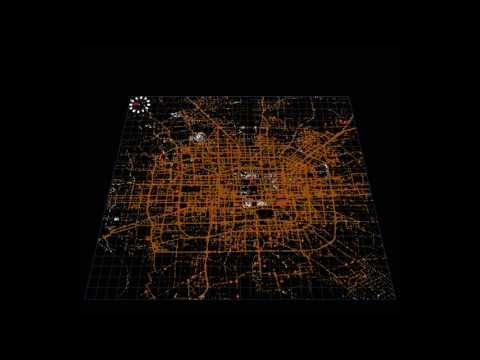

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('VQ1f312SVqg',width=700, height=600)

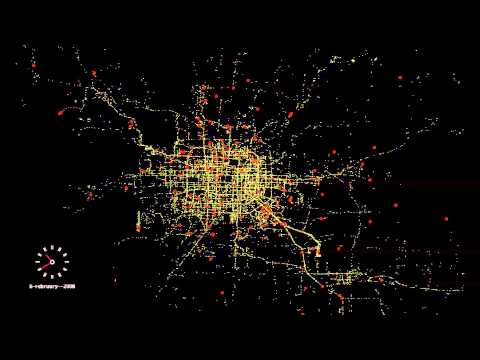

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('D6XTyLbO13w',width=700, height=600)

## But really how to use this data?
#### 1. Info-graphics or just real time visualizations!!
#### 2. Data analytics in a real time or a large scale fashion! (80% of Big Data community)
#### 3. Looking seriously for universal laws in complex Systems? (Natural models in community of physicists)
#### 4. Optimizing the parametric set up of rational models? (rational Models) ---> Very common in engineering thesedays
#### 5. Or a new level of data-driven models in coexistence with urban data streams **(Pre-specifics)**


## Now assuming data is available WHAT should we learn for Data Driven Modeling? 

<img src="files/Images/DataDrivenModelingElements.png"width =600, height=600/>


# But HOW to learn them?
## Resource Based --> Forward but slow and might take a BSc.
## Market Oriented --> Backward, might work, but mostly we get simply puzzled
## Connecting the dots in a guided path --- Wiki-based approach


<a></a>
<img src="files/Images/DataDrivenModelingKW.png"width =600, height=600/>

### Topics to be discussed (Not in the order of sessions)  
* This list will be updated over time.
* All the topics will be discussed with codes in Python

**Probability Theory**
* Certainty and Determinism
* Laplace’s demon
* Poncare and the end of determinism
* Deterministic Unpredictability (Chaos Theory and Bifurcation)
* Uncertainty and Randomness
* Fuzziness, vagueness and ambiguity
* Variance and 
* Variable and Parameter
* Random Variable
* Probability (Kolmogrov) axioms
* Probability distributions
* Expected Value
* Variance
* Covariance
* Independent Random Variables 
* Joint Probability 
* Baysian Rules and Conditional Probability

**Statistics**
* Central Limit Theorem (CLT)
* Law of large numbers
* Statistical Measures 
    * Mean, Median, Standard Deviation, Skewness, Lp norms
* Outliers, histograms
* Bias Vs. Variance
* Hypothesis Testing
* Causality and Correlations
* Random Walk
* Brownian motion 
* Resampling
* Non-parametric Statistics 

**Statistical Learning**
* Least Square method and spring model 
* Maximum Likelihood Estimation
* Regression models and curve fitting using polynomials
* Structure Learning in comparison to Polynomials
* Regularized Models
* Learning densities vs. designed densities
* Learning kernels vs. designed Kernels
* Learning Dictionaries vs. designed Dictionaries
* Over Fitting and generalization
* Probabilistic Graphical Models
* Quality Measures: Validation, Precision/Recall and other terms
* Markov chains and stochastic processes
* Baysian Networks

**Linear Algebra**
* Points,Vectors and Matrices
* Matrix operations
* Algebraic Operations
* Systems of Linear Equations
* Similarity and distances between vectors
* Euclidean, Hamming, Mahalanobis, Hausdorff
* Linear Transformations: PCA, ICA
* Markov Chains
* Fourier Transformation
* Dictionary Learning, Sparse coding


**Optimization**
* Objective function
* Exact Methods
* Linear Programming
* Complexity
* Approximate Methods
* Gradient Descent
* Hill climbing methods
* Meta Heuristics


**Machine Learning**
* Supervised Learning
* Unsupervised Learning
* Reinforcement Learning
* Classification
* Clustering and pattern recognition
* Prediction
* Function approximation
* Feature selection/extraction
* Transfer Function
* Dimensionality reduction
* Manifold learning
* Decision trees
* Naïve Base classifier
* Ensemble methods
* Support Vector Machines (SVM)
* **Self Organizing Maps (SOM)** 
* Structured Prediction and Random fields
* Kernels and Kernel learning: in Image processing examples 
* Energy Based Models 
* Dictionary Learning
* Autoencoders
* Deep Learning 



[ 0.35        0.37676768  0.40353535  0.43030303  0.45707071  0.48383838
  0.51060606  0.53737374  0.56414141  0.59090909  0.61767677  0.64444444
  0.67121212  0.6979798   0.72474747  0.75151515  0.77828283  0.80505051
  0.83181818  0.85858586  0.88535354  0.91212121  0.93888889  0.96565657
  0.99242424  1.01919192  1.0459596   1.07272727  1.09949495  1.12626263
  1.1530303   1.17979798  1.20656566  1.23333333  1.26010101  1.28686869
  1.31363636  1.34040404  1.36717172  1.39393939  1.42070707  1.44747475
  1.47424242  1.5010101   1.52777778  1.55454545  1.58131313  1.60808081
  1.63484848  1.66161616  1.68838384  1.71515152  1.74191919  1.76868687
  1.79545455  1.82222222  1.8489899   1.87575758  1.90252525  1.92929293
  1.95606061  1.98282828  2.00959596  2.03636364  2.06313131  2.08989899
  2.11666667  2.14343434  2.17020202  2.1969697   2.22373737  2.25050505
  2.27727273  2.3040404   2.33080808  2.35757576  2.38434343  2.41111111
  2.43787879  2.46464646  2.49141414  2.51818182  2

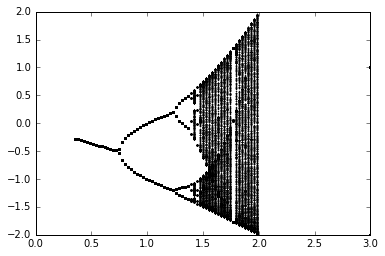

In [218]:
import numpy as n
import scipy as s
import pylab as p

xa=.35
xb=3.

C=n.linspace(xa,xb,num=100)
print C
iter=range(1000)
Y = C*0+1
for x in iter:
    Y=Y**2-C
# p.plot(C,Y, '.k', markersize = 2)
for x in iter:
    Y = Y**2 - C
    p.plot(C,Y, '.k', markersize = 2)


p.show()


[ 0.35        0.37676768  0.40353535  0.43030303  0.45707071  0.48383838
  0.51060606  0.53737374  0.56414141  0.59090909  0.61767677  0.64444444
  0.67121212  0.6979798   0.72474747  0.75151515  0.77828283  0.80505051
  0.83181818  0.85858586  0.88535354  0.91212121  0.93888889  0.96565657
  0.99242424  1.01919192  1.0459596   1.07272727  1.09949495  1.12626263
  1.1530303   1.17979798  1.20656566  1.23333333  1.26010101  1.28686869
  1.31363636  1.34040404  1.36717172  1.39393939  1.42070707  1.44747475
  1.47424242  1.5010101   1.52777778  1.55454545  1.58131313  1.60808081
  1.63484848  1.66161616  1.68838384  1.71515152  1.74191919  1.76868687
  1.79545455  1.82222222  1.8489899   1.87575758  1.90252525  1.92929293
  1.95606061  1.98282828  2.00959596  2.03636364  2.06313131  2.08989899
  2.11666667  2.14343434  2.17020202  2.1969697   2.22373737  2.25050505
  2.27727273  2.3040404   2.33080808  2.35757576  2.38434343  2.41111111
  2.43787879  2.46464646  2.49141414  2.51818182  2

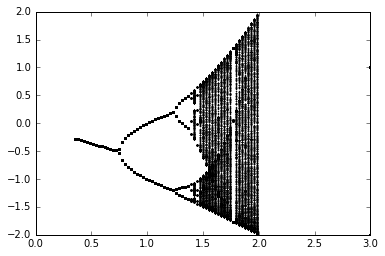

In [237]:
import numpy as n
import scipy as s
import pylab as p

xa=.35
xb=3.

C=n.linspace(xa,xb,num=100)
print C
iter=range(1000)
Y = C*0+1
YS =  []
for x in iter:
    Y=Y**2-C
# p.plot(C,Y, '.k', markersize = 2)
for x in iter:
    
    Y = Y**2 - C
    YS.append(Y)
    p.plot(C,Y, '.k', markersize = 2)


p.show()


In [223]:
YS = np.asarray(YS)

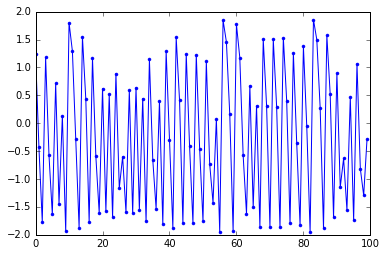

In [236]:
plt.plot(YS[:,60][:100],'.-')